# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,r2_score

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')

# Data Loading

In [2]:
df = pd.read_csv("BTC-USD.csv")

In [3]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
5,2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600
6,2014-09-23,402.092010,441.557007,396.196991,435.790985,435.790985,45099500
7,2014-09-24,435.751007,436.112000,421.131989,423.204987,423.204987,30627700
8,2014-09-25,423.156006,423.519989,409.467987,411.574005,411.574005,26814400
9,2014-09-26,411.428986,414.937988,400.009003,404.424988,404.424988,21460800


In [4]:
viz = df.copy()

# Data Preparation

In [5]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
df.shape

(2713, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2713 entries, 0 to 2712
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2713 non-null   object 
 1   Open       2713 non-null   float64
 2   High       2713 non-null   float64
 3   Low        2713 non-null   float64
 4   Close      2713 non-null   float64
 5   Adj Close  2713 non-null   float64
 6   Volume     2713 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 148.5+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,2713.0,1.131104e+04,1.610643e+04,1.768970e+02,6.063970e+02,6.301570e+03,1.045240e+04,6.754973e+04
High,2713.0,1.161429e+04,1.653739e+04,2.117310e+02,6.092610e+02,6.434618e+03,1.076264e+04,6.878962e+04
Low,2713.0,1.097556e+04,1.560857e+04,1.715100e+02,6.041100e+02,6.214220e+03,1.020239e+04,6.638206e+04
Close,2713.0,1.132391e+04,1.611037e+04,1.781030e+02,6.067190e+02,6.317610e+03,1.046226e+04,6.756683e+04
Adj Close,2713.0,1.132391e+04,1.611037e+04,1.781030e+02,6.067190e+02,6.317610e+03,1.046226e+04,6.756683e+04
Volume,2713.0,1.470462e+10,2.001627e+10,5.914570e+06,7.991080e+07,5.098183e+09,2.456992e+10,3.509679e+11


In [9]:
train, test = train_test_split(df, test_size = 0.2)

In [10]:
test_pred = test.copy()

In [11]:
train.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
694,2016-08-11,592.124023,597.541992,589.119995,589.119995,589.119995,74514400
2491,2021-07-13,33125.468750,33327.101563,32261.419922,32702.025391,32702.025391,19120856669
2493,2021-07-15,32827.875000,33159.640625,31175.708984,31780.730469,31780.730469,21300524237
1460,2018-09-16,6536.680176,6544.330078,6460.100098,6517.180176,6517.180176,3273730000
2607,2021-11-06,61068.875000,61590.683594,60163.781250,61527.480469,61527.480469,29094934221
1266,2018-03-06,11500.099609,11500.099609,10694.299805,10779.900391,10779.900391,6832169984
95,2014-12-21,329.542999,329.628998,318.903015,320.842987,320.842987,15207600
1125,2017-10-16,5687.569824,5776.229980,5544.209961,5725.589844,5725.589844,2008070016
1805,2019-08-27,10372.826172,10381.328125,10087.300781,10185.500000,10185.500000,14762609503
1926,2019-12-26,7274.799316,7388.302734,7200.386719,7238.966797,7238.966797,22787010034


In [12]:
test.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
797,2016-11-22,739.643005,753.869995,736.526978,751.346985,751.346985,129906000
1365,2018-06-13,6596.879883,6631.660156,6285.629883,6349.899902,6349.899902,5052349952
697,2016-08-14,585.588989,585.666016,564.781006,570.473022,570.473022,60851100
2241,2020-11-05,14133.733398,15706.404297,14102.088867,15579.848633,15579.848633,40856321439
1201,2017-12-31,12897.700195,14377.400391,12755.599609,14156.400391,14156.400391,12136299520
2070,2020-05-18,9675.695313,9906.030273,9570.359375,9726.575195,9726.575195,41827139896
432,2015-11-23,324.350006,325.118011,321.290009,323.045990,323.045990,27478900
2150,2020-08-06,11749.871094,11902.335938,11598.713867,11779.773438,11779.773438,23400740340
1090,2017-09-11,4122.470215,4261.669922,4099.399902,4161.270020,4161.270020,1557330048
2446,2021-05-29,35684.156250,37234.500000,33693.929688,34616.066406,34616.066406,45231013335


In [13]:
x_train = train[['Open', 'High', 'Low', 'Volume']].values
x_test = test[['Open', 'High', 'Low', 'Volume']].values

In [14]:
y_train = train['Close'].values
y_test = test['Close'].values

# Linear Regression

In [15]:
model_lnr = LinearRegression()
model_lnr.fit(x_train, y_train)

LinearRegression()

In [16]:
y_pred = model_lnr.predict(x_test)

In [17]:
result = model_lnr.predict([[262.000000, 267.899994, 250.029999, 11896100]])
print(result)

[258.89569018]


# Model Evaluation

In [18]:
print("MSE",round(mean_squared_error(y_test,y_pred), 3))
print("RMSE",round(np.sqrt(mean_squared_error(y_test,y_pred)), 3))
print("MAE",round(mean_absolute_error(y_test,y_pred), 3))
print("MAPE",round(mean_absolute_percentage_error(y_test,y_pred), 3))
print("R2 Score : ", round(r2_score(y_test,y_pred), 3))

MSE 116225.918
RMSE 340.919
MAE 145.907
MAPE 0.01
R2 Score :  1.0


# Model saving using pickle

In [19]:
import pickle
# Saving model to disk
pickle.dump(model_lnr, open('model.pkl','wb'))

# Model Visualization

In [20]:
def style():
    plt.figure(facecolor='black', figsize=(15,10))
    ax = plt.axes()

    ax.tick_params(axis='x', colors='white')    #setting up X-axis tick color to white
    ax.tick_params(axis='y', colors='white')    #setting up Y-axis tick color to white

    ax.spines['left'].set_color('white')        #setting up Y-axis spine color to white
    #ax.spines['right'].set_color('white')
    #ax.spines['top'].set_color('white')
    ax.spines['bottom'].set_color('white')      #setting up X-axis spine color to white

    ax.set_facecolor("black")                   # Setting the background color of the plot using set_facecolor() method

In [21]:
viz['Date']=pd.to_datetime(viz['Date'],format='%Y-%m-%d')

In [22]:
data = pd.DataFrame(viz[['Date','Close']])
data=data.reset_index()
data=data.drop('index',axis=1)
data.set_index('Date', inplace=True)
data = data.asfreq('D')
data

,Close
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014
...,...
2022-02-15,44575.203125
2022-02-16,43961.859375
2022-02-17,40538.011719


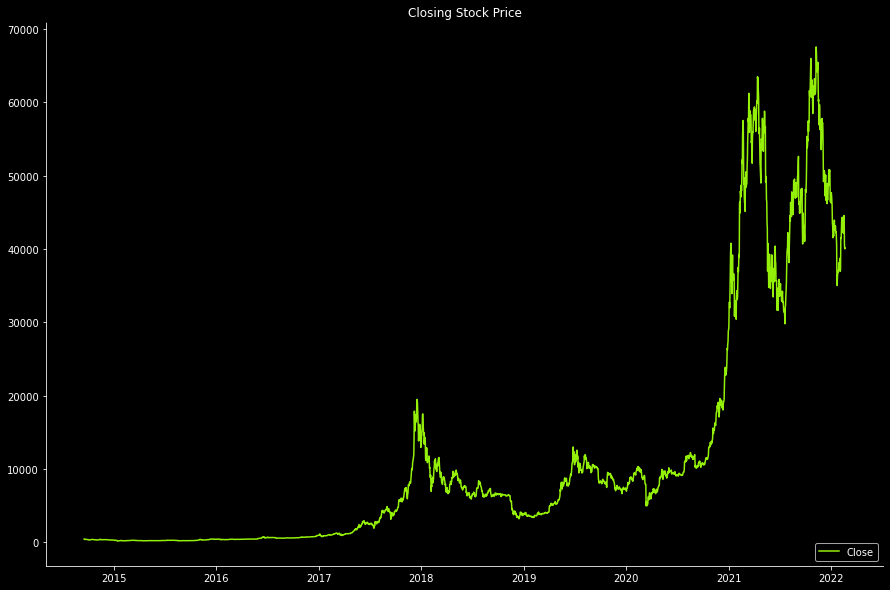

In [23]:
style()

plt.title('Closing Stock Price', color="white")
plt.plot(viz.Date, viz.Close, color="#94F008")
plt.legend(["Close"], loc ="lower right", facecolor='black', labelcolor='white')

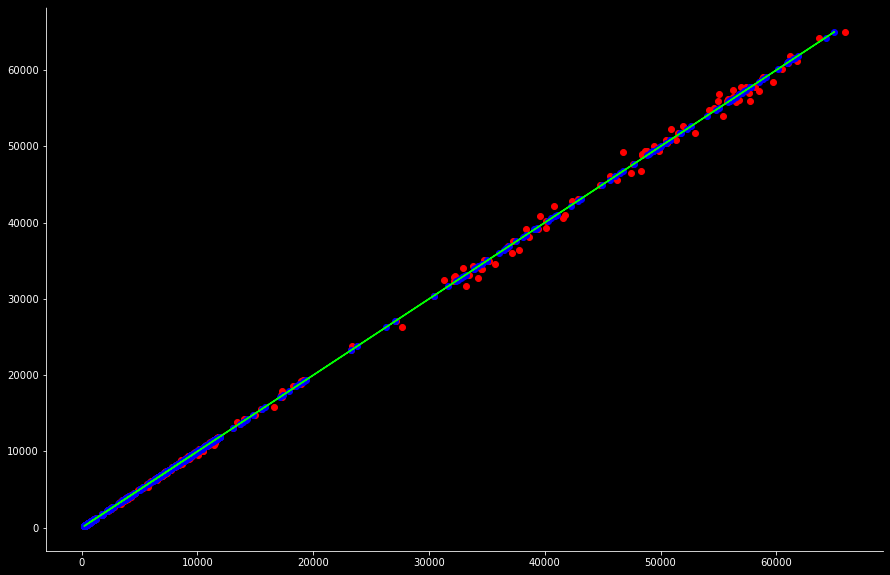

In [24]:
style()

plt.scatter(y_pred, y_test, color='red', marker='o')
plt.scatter(y_test, y_test, color='blue')
plt.plot(y_test, y_test, color='lime')

In [25]:
test_pred['Close_Prediction'] = y_pred
test_pred

,Date,Open,High,Low,Close,Adj Close,Volume,Close_Prediction
797,2016-11-22,739.643005,753.869995,736.526978,751.346985,751.346985,129906000,747.365782
1365,2018-06-13,6596.879883,6631.660156,6285.629883,6349.899902,6349.899902,5052349952,6402.518256
697,2016-08-14,585.588989,585.666016,564.781006,570.473022,570.473022,60851100,570.136077
2241,2020-11-05,14133.733398,15706.404297,14102.088867,15579.848633,15579.848633,40856321439,15481.435240
1201,2017-12-31,12897.700195,14377.400391,12755.599609,14156.400391,14156.400391,12136299520,14074.622504
...,...,...,...,...,...,...,...,...
1147,2017-11-07,7023.100098,7253.319824,7023.100098,7144.379883,7144.379883,2326340096,7196.632392
2098,2020-06-15,9386.035156,9504.860352,8990.175781,9450.702148,9450.702148,26699704768,9217.063788
2409,2021-04-22,53857.105469,55410.230469,50583.812500,51762.273438,51762.273438,74798630778,52960.515641
1295,2018-04-04,7456.410156,7469.879883,6803.879883,6853.839844,6853.839844,4936000000,7021.743703


In [26]:
test_pred[['Close', 'Close_Prediction']].describe().T

,count,mean,std,min,25%,50%,75%,max
Close,543.0,11724.769194,16721.565869,219.184998,598.415527,6349.899902,10767.667968,64995.230469
Close_Prediction,543.0,11733.583034,16719.554793,221.410134,599.341746,6358.563592,10770.145563,65923.924986


**Actual Close Price vs. Predicted Close Price**
<div class="flourish-embed flourish-chart" data-src="visualisation/13412598"><script src="https://public.flourish.studio/resources/embed.js"></script></div>

# Saving the Data as CSV

In [27]:
test_pred['Date'] = pd.to_datetime(test_pred['Date'],format='%Y-%m-%d')

In [28]:
output = pd.DataFrame(test_pred[['Date', 'Close', 'Close_Prediction']])
output = output.reset_index()
output = output.drop('index',axis=1)
output.set_index('Date', inplace=True)
output =  output.asfreq('D')
output

,Close,Close_Prediction
Date,,
2014-09-18,424.440002,427.351123
2014-09-19,394.795990,400.745901
2014-09-20,NaN,NaN
2014-09-21,NaN,NaN
2014-09-22,NaN,NaN
...,...,...
2022-02-13,NaN,NaN
2022-02-14,NaN,NaN
2022-02-15,NaN,NaN


In [29]:
output.to_csv('Close_Prediction.csv', index=True)
print("CSV successfully saved!")

CSV successfully saved!
